In [3]:
print("hello world " * 3)

hello world hello world hello world 


### Press A to inser cell above
### Press B to insert cell below
### D D to delete. Follow other commands as above

### Everything happens within a cell

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
x = np.linspace(1,10,500)
y = np.cumsum(np.random.randn(500,6), 0) #RANDOM GENERATED DATA POINTS

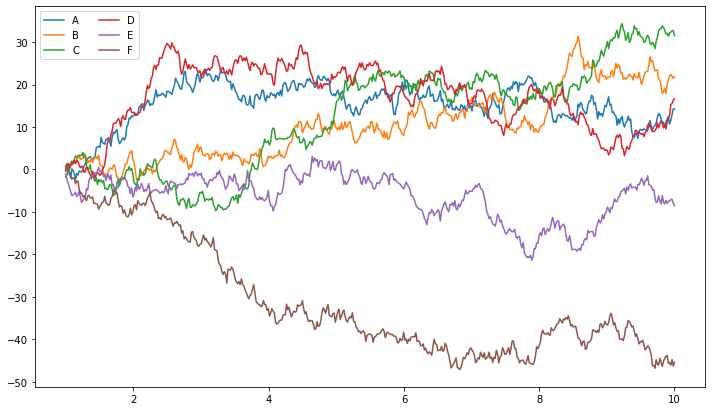

In [7]:
plt.figure(figsize = (12,7))
plt.plot(x,y)
plt.legend('ABCDEF', ncol = 2, loc = 'upper left') 

#### PART 3: INTERACTING WITH DATA

In [8]:
import requests
import pandas as pd

In [13]:
# Predefined function that simplifies the process of importing data from Cryptowatch
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df


In [ ]:
# I will now pull data from bitcoin and ether (two cryptos)

In [14]:
# Setting timestamps we want the values from
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2021-11-15 00:17:59.120784')

In [15]:
btc = get_historic_price('btc', 'bitstamp', after = last_week)

In [16]:
eth = get_historic_price('eth', 'bitstamp', after = last_week)

In [17]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-11-15 01:00:00,65509.87,66215.60,65509.87,65861.67,208.649415,1.376075e+07
2021-11-15 02:00:00,65858.11,65941.44,65535.97,65913.40,65.622000,4.317949e+06
2021-11-15 03:00:00,65946.48,65972.71,65686.04,65721.45,23.097567,1.520182e+06
2021-11-15 04:00:00,65702.67,65901.15,65620.99,65788.38,36.207688,2.379841e+06
2021-11-15 05:00:00,65801.26,65894.34,65727.74,65809.34,60.656441,3.991807e+06


<AxesSubplot:xlabel='CloseTime'>

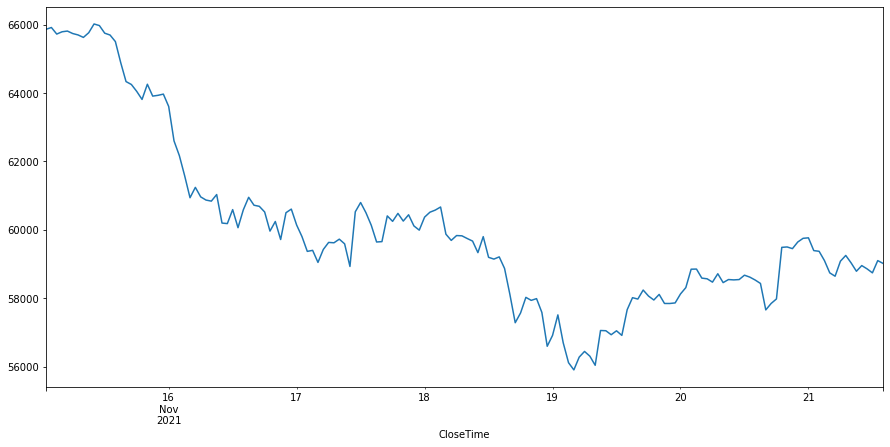

In [18]:
btc['ClosePrice'].plot(figsize=(15,7))

In [19]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-11-15 01:00:00,4634.50,4696.33,4633.83,4679.48,561.320590,2.621158e+06
2021-11-15 02:00:00,4678.59,4727.97,4664.75,4716.24,1778.279936,8.317493e+06
2021-11-15 03:00:00,4718.86,4723.56,4690.61,4694.96,1309.153062,6.159338e+06
2021-11-15 04:00:00,4696.33,4713.01,4688.91,4704.77,592.126547,2.783343e+06
2021-11-15 05:00:00,4713.51,4726.27,4701.51,4710.53,2058.269595,9.721472e+06


<AxesSubplot:xlabel='CloseTime'>

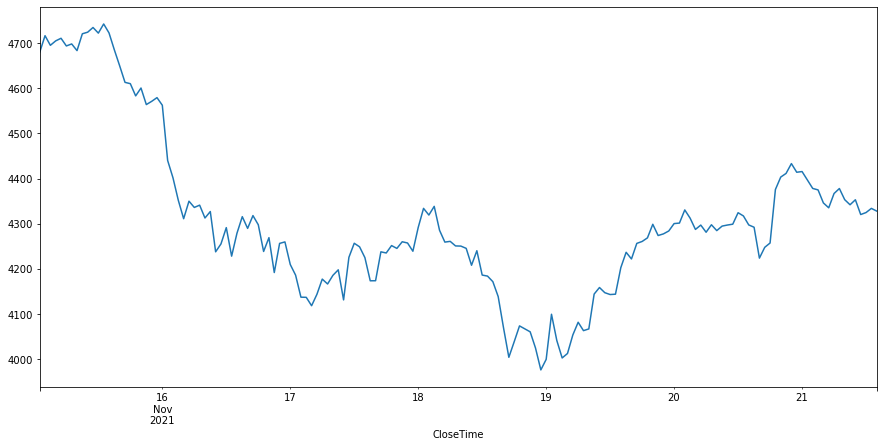

In [20]:
eth['ClosePrice'].plot(figsize = (15,7))

In [21]:
btc.describe() # We actually have 158 records

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,158.000000,158.000000,158.000000,158.000000,158.000000,1.580000e+02
mean,60055.909684,60337.827468,59708.146582,60013.072342,135.494851,8.090007e+06
std,2533.132017,2487.047812,2531.339844,2500.335644,118.417215,6.970888e+06
min,55930.670000,56246.780000,55640.000000,55909.850000,13.951406,8.177518e+05
25%,58479.242500,58727.030000,58328.407500,58489.702500,55.965385,3.319860e+06
50%,59619.380000,59824.230000,59280.805000,59608.390000,111.039041,6.629192e+06
75%,60632.342500,60926.897500,60311.252500,60591.382500,185.734967,1.094259e+07
max,65950.880000,66387.400000,65762.540000,66016.410000,742.683836,4.337693e+07


#### Bokeh has interactive charts (Look into notebooks if ever required)

In [ ]:
#Dynamically generated chart, can zoom in

### Part 4: Exporting to Excel

In [23]:
writer = pd.ExcelWriter('cryptos.xlsx') # Crypto file exported as an excel spreadsheet

In [24]:
# Write both our bitcoin and ether data as diff sheets
btc.to_excel(writer, sheet_name = 'Bitcoin')
eth.to_excel(writer, sheet_name = 'Ether')

In [25]:
writer.save()

In [26]:
ls

Chapter2.ipynb
Chapter3.ipynb
Chapter4.ipynb
Chapter5.ipynb
Chapter5_new.ipynb
Chapter6.ipynb
Chapter7.ipynb
EN-FINAL Table 9.pdf
Lesson2&3_DataAnalysisExamples.ipynb
Lesson3_part2.ipynb
Lesson4_5&6JupyterNotebooks.ipynb
SOWC 2014 Stat Tables_Table 9.xlsx
Sonia - Student Pre-internship Form.pdf
Untitled.ipynb
Untitled1.ipynb
cryptos.xlsx
data-text.csv
data-text.json
data-text.xml
data_wrangling.db
data_wrangling.db-shm
data_wrangling.db-wal
en-final-table9.txt
import_xml_data.ipynb
mn.csv
mn_headers.csv
mn_headers_updated.csv
sakila.db
sakilla.db
sales_data.csv
